# Stochastic Gradient Descent

Мы будем делать стохастический градиентный спуск для кастомного счётчика лосса, что позволит нам пропихнуть сюда как SMAPE, так и MSE.

Опять же, имплементация будет в отдельном модуле, а здесь мы только протестируем её.

In [1]:
from sgd import SGDRegressor as CustomSGD
from sklearn.linear_model import SGDRegressor as SKSGD

%load_ext autoreload
%autoreload 2

skl = SKSGD(fit_intercept=True)
cst = CustomSGD(max_iter=10000)

In [2]:
import numpy as np

X = np.array([[2],
              [3],
              [5]])

y = np.array([0, 1, 2])

In [3]:
skl.fit(X, y).predict(X)

array([0.68776093, 1.01048075, 1.65592038])

In [4]:
cst.fit(X, y).predict(X)

array([0.14356668, 0.78602195, 2.07093248])

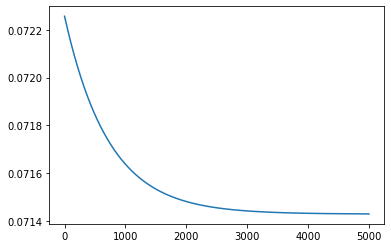

In [5]:
from matplotlib import pyplot as plt

plt.plot(cst.epoch_loss_[5000:])
plt.show()

Ну вообще неплохо так выходит. Больше того, похоже на exact версию!

In [6]:
cst.epoch_loss_[-1]

0.07142941563008996

Теперь попробуем с какой-нибудь регуляризацией:

In [7]:
cstreg = CustomSGD(max_iter=10000, reg='Lasso', lasso_tau=0.1)

In [8]:
cstreg.fit(X, y).predict(X)

array([0.2218537 , 0.81804148, 2.01041705])

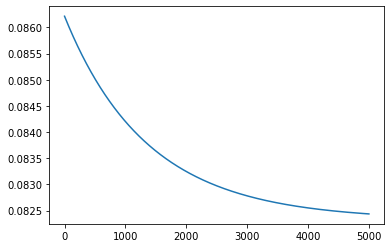

In [9]:
plt.plot(cstreg.epoch_loss_[5000:])
plt.show()

In [10]:
cst.coef_, cstreg.coef_

(array([0.64245527]), array([0.59618778]))

Как можно видеть, регуляризация штрафует наш коэффициент, ухудшая лосс.